<a href="https://colab.research.google.com/github/BelideSaiTeja/Lasso-and-Ridge/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A linear regression model that implements L1 norm for regularisation is called lasso regression, and one that implements (squared) L2 norm for regularisation is called ridge regression. To implement these two, note that the linear regression model stays the same:



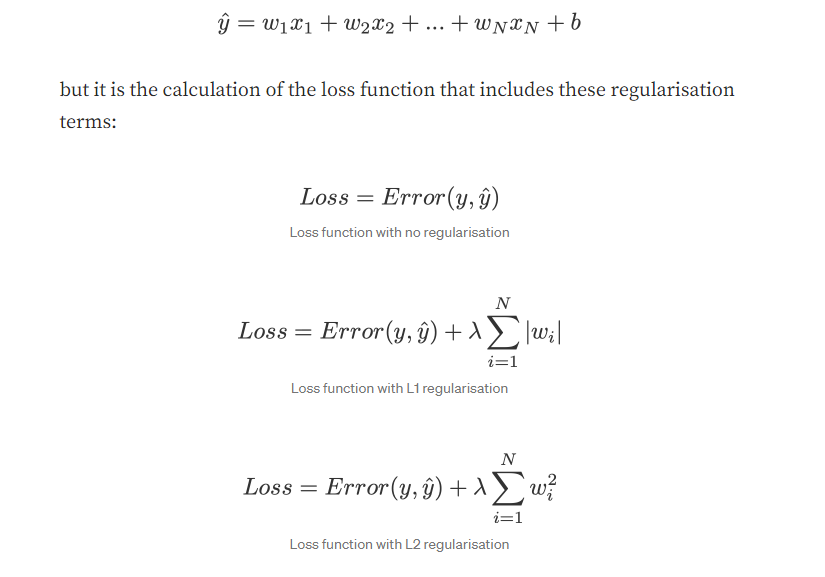

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df['prefarea'] = le.fit_transform(df['prefarea'])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
X = df.drop('price', axis = 'columns')
y = df['price']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

mse = cross_val_score(lin_model, X, y, scoring = 'neg_mean_squared_error', cv = 5)
#print(mse)
mean_mse = np.mean(mse)
print('Linear Model MSE: ', mean_mse)

Linear Model MSE:  -2056323495315.6309


**RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-1, 1, 10, 20, 35, 60, 80, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1,
                                   10, 20, 35, 60, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 1e-15}

In [ ]:
ridge_regressor.best_score_

-2056323495315.6257

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-1, 1, 10, 20, 35, 60, 80, 100]}
lasso_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X, y)
print('Best parameters: ', lasso_regressor.best_params_)
print('Best score mse: ', lasso_regressor.best_score_)

Best parameters:  {'alpha': 1e-15}
Best score mse:  -2056323495315.6257


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

prediction_ridge = ridge_regressor.predict(X_test)
prediction_lasso = lasso_regressor.predict(X_test)

<ipython-input-65-98c07b4b5fd9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge);


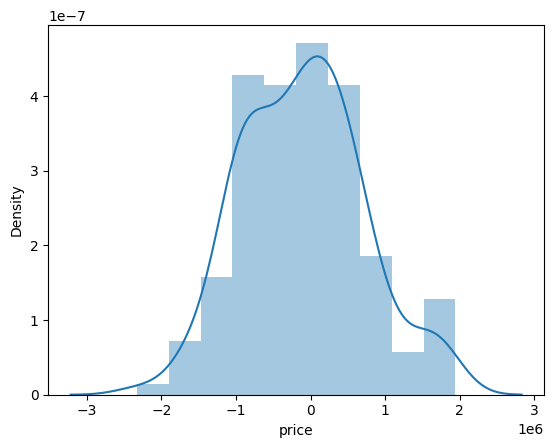

In [ ]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge);

<ipython-input-66-f5ba9fbb7a6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test- prediction_lasso)


<Axes: xlabel='price', ylabel='Density'>

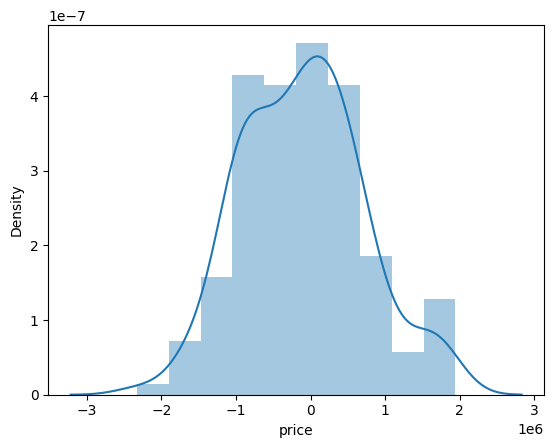

In [ ]:
sns.distplot(y_test- prediction_lasso)